# Two mode networks and structural equivalence

## From two-mode to one-mode networks

To illustrate how to use matrix multiplication to transform a 2-mode network into a 1-mode network, we make use of the davis' women by event data set. The input data is an edge list in csv format.

In [1]:
library(igraph)

davis <- read.csv("data/davis.csv", header = FALSE)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
class(davis)

[1] "data.frame"

In [3]:
head(davis)

,V1,V2
,<chr>,<int>
1,EVELYN,1
2,EVELYN,2
3,EVELYN,3
4,EVELYN,4
5,EVELYN,5
6,EVELYN,6


In [4]:
# We can transform the data frame format into an igraph object.
g <- graph_from_data_frame(davis, directed = FALSE, vertices = NULL)

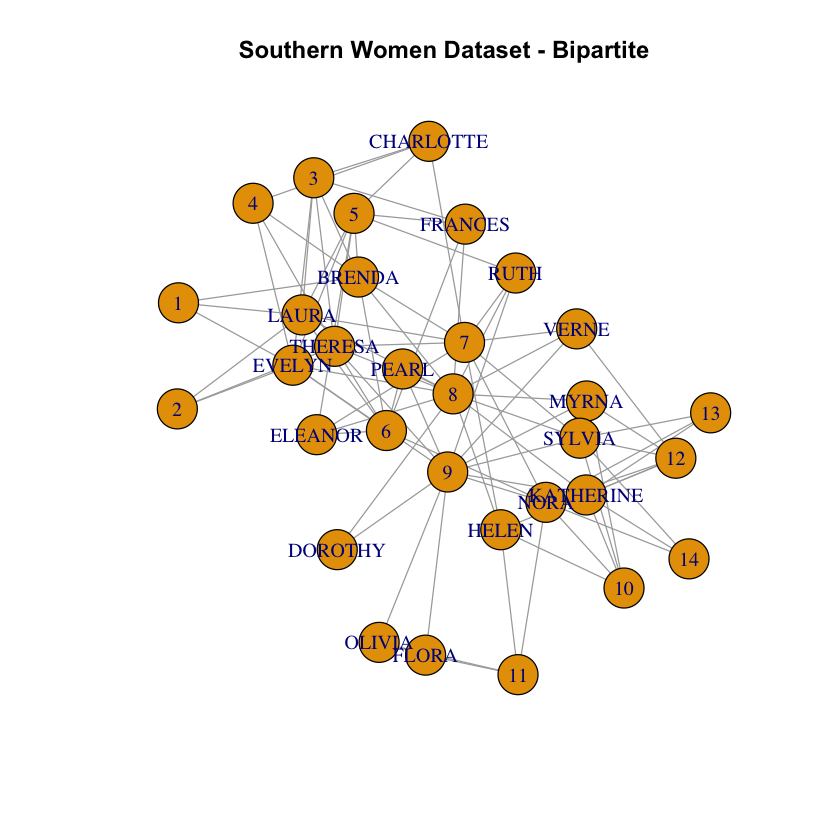

In [5]:
# To visualize the graph we have to save it as a bipartite network
g2M <- g
V(g2M)$type <- bipartite_mapping(g2M)$type  # Add the "type" attribute

plot(g2M,
     layout = layout_with_kk,
     main = "Southern Women Dataset - Bipartite")

In [6]:
# To do the matrix multiplication we save it as two-mode matrix
twomode_matrix <- as_incidence_matrix(g2M)
# This should give you the women by event matrix
twomode_matrix[]

,1,2,3,4,5,6,8,7,9,10,12,13,11,14
EVELYN,1,1,1,1,1,1,1,0,1,0,0,0,0,0
LAURA,1,1,1,0,1,1,1,1,0,0,0,0,0,0
THERESA,0,1,1,1,1,1,1,1,1,0,0,0,0,0
BRENDA,1,0,1,1,1,1,1,1,0,0,0,0,0,0
CHARLOTTE,0,0,1,1,1,0,0,1,0,0,0,0,0,0
FRANCES,0,0,1,0,1,1,1,0,0,0,0,0,0,0
ELEANOR,0,0,0,0,1,1,1,1,0,0,0,0,0,0
PEARL,0,0,0,0,0,1,1,0,1,0,0,0,0,0
RUTH,0,0,0,0,1,0,1,1,1,0,0,0,0,0
VERNE,0,0,0,0,0,0,1,1,1,0,1,0,0,0


In [7]:
# We can transpose the matrix and get the event by women matrix
t(twomode_matrix[])

,EVELYN,LAURA,THERESA,BRENDA,CHARLOTTE,FRANCES,ELEANOR,PEARL,RUTH,VERNE,MYRNA,KATHERINE,SYLVIA,NORA,HELEN,DOROTHY,OLIVIA,FLORA
1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0
8,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0
7,0,1,1,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0
9,1,0,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1
10,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0


In [8]:
# To convert the two-mode matrix to a one-mode matrix we can use matrix 
# multiplication. Do matrix multiplication to get person and event network
# The person by person matrix
p <- twomode_matrix %*% t(twomode_matrix)
p[]

,EVELYN,LAURA,THERESA,BRENDA,CHARLOTTE,FRANCES,ELEANOR,PEARL,RUTH,VERNE,MYRNA,KATHERINE,SYLVIA,NORA,HELEN,DOROTHY,OLIVIA,FLORA
EVELYN,8,6,7,6,3,4,3,3,3,2,2,2,2,2,1,2,1,1
LAURA,6,7,6,6,3,4,4,2,3,2,1,1,2,2,2,1,0,0
THERESA,7,6,8,6,4,4,4,3,4,3,2,2,3,3,2,2,1,1
BRENDA,6,6,6,7,4,4,4,2,3,2,1,1,2,2,2,1,0,0
CHARLOTTE,3,3,4,4,4,2,2,0,2,1,0,0,1,1,1,0,0,0
FRANCES,4,4,4,4,2,4,3,2,2,1,1,1,1,1,1,1,0,0
ELEANOR,3,4,4,4,2,3,4,2,3,2,1,1,2,2,2,1,0,0
PEARL,3,2,3,2,0,2,2,3,2,2,2,2,2,2,1,2,1,1
RUTH,3,3,4,3,2,2,3,2,4,3,2,2,3,2,2,2,1,1
VERNE,2,2,3,2,1,1,2,2,3,4,3,3,4,3,3,2,1,1


In [9]:
# The event by event matrix
e <- t(twomode_matrix) %*% twomode_matrix
e[]

,1,2,3,4,5,6,8,7,9,10,12,13,11,14
1,3,2,3,2,3,3,3,2,1,0,0,0,0,0
2,2,3,3,2,3,3,3,2,2,0,0,0,0,0
3,3,3,6,4,6,5,5,4,2,0,0,0,0,0
4,2,2,4,4,4,3,3,3,2,0,0,0,0,0
5,3,3,6,4,8,6,7,6,3,0,0,0,0,0
6,3,3,5,3,6,8,7,5,4,1,1,1,1,1
8,3,3,5,3,7,7,14,8,9,4,5,2,1,2
7,2,2,4,3,6,5,8,10,5,3,4,2,2,2
9,1,2,2,2,3,4,9,5,12,4,5,3,3,3
10,0,0,0,0,0,1,4,3,4,5,5,3,2,3


As discussed by Borgatti in section 13.2, it can be a good idea to normalize the overlap to take into account the size of events and/or the frequence of participation of the women. The following lines execute the normalization as proposed by Bonacich '72. 

Mathematically, the normalization works in the following way -- formulated for the transformation into a person-by-person matrix: 

Consider two actors `i` and `j` and let `X` be the product of the number events they both attended and the number of events they both did not attend. Let `Y` be the product of the number events `i` attended and `j` did not, with the number of events `j` attended and `i` did not. 

If $X=Y$ the normalized entry is $0.5$. Otherwise it is $X-\sqrt{XY} \over X-Y$. As far as I know the Bonacich normalization is not part of the standard measures in igraph but the following script will calculate it for you

In [10]:
#we do it first for the person-by-person network
p_norm <- p
total_events <- ncol(e)
total_events

[1] 14

In [11]:
person_matrix_diagonal <- diag(p)
nrow(p)

[1] 18

In [12]:
ncol(p)

[1] 18

In [13]:
# Create the loop with r and c to iterate over the matrix
for (i in 1:nrow(p)) {
  for (j in 1:ncol(p)) { 
    a <- p[i, j]
    # print(a)
    b <- p[i, i]-p[i, j]
    #print(b)
    c <- p[j, j]-p[j, i]
    #print(c)
    d <- total_events-a-b-c
    #print(d)
    if (a * d == b * c) {
      p_norm[i, j] <- 50
    } else {
      p_norm[i, j] <- ((a * d - sqrt (a * d * b * c)) / ( (a * d)  -  (b * c))) * 100
    }
    #print(e_norm)
  }
}
format(p_norm[], digits = 2, nsmall = 2)

,EVELYN,LAURA,THERESA,BRENDA,CHARLOTTE,FRANCES,ELEANOR,PEARL,RUTH,VERNE,MYRNA,KATHERINE,SYLVIA,NORA,HELEN,DOROTHY,OLIVIA,FLORA
EVELYN,100.00,79.48,85.54,79.48,63.40,100.00,63.40,100.00,63.40,44.95,44.95,28.99,20.52,0.00,21.09,100.00,45.80,45.80
LAURA,79.48,100.00,79.48,85.71,67.96,100.00,100.00,60.77,67.96,50.00,32.04,20.52,28.57,20.52,42.21,50.00,0.00,0.00
THERESA,85.54,79.48,100.00,79.48,100.00,100.00,100.00,100.00,100.00,63.40,44.95,28.99,35.39,25.73,36.60,100.00,45.80,45.80
BRENDA,79.48,85.71,79.48,100.00,100.00,100.00,100.00,60.77,67.96,50.00,32.04,20.52,28.57,20.52,42.21,50.00,0.00,0.00
CHARLOTTE,63.40,67.96,100.00,100.00,100.00,66.67,66.67,0.00,66.67,46.86,0.00,0.00,32.04,27.43,41.42,0.00,0.00,0.00
FRANCES,100.00,100.00,100.00,100.00,66.67,100.00,83.86,75.00,66.67,46.86,46.86,36.60,32.04,27.43,41.42,63.40,0.00,0.00
ELEANOR,63.40,100.00,100.00,100.00,66.67,83.86,100.00,75.00,83.86,66.67,46.86,36.60,50.00,44.95,60.44,63.40,0.00,0.00
PEARL,100.00,60.77,100.00,60.77,0.00,75.00,75.00,100.00,75.00,75.00,75.00,65.17,60.77,56.35,48.33,100.00,69.10,69.10
RUTH,63.40,67.96,100.00,67.96,66.67,66.67,83.86,75.00,100.00,83.86,66.67,55.05,67.96,44.95,60.44,100.00,63.40,63.40
VERNE,44.95,50.00,63.40,50.00,46.86,46.86,66.67,75.00,83.86,100.00,83.86,72.57,100.00,63.40,77.60,100.00,63.40,63.40


In [14]:
#and now for the event-by-event matrix 
e_norm <- e
total_persons <- ncol(p)
total_persons

[1] 18

In [15]:
event_matrix_diagonal <- diag(e)
nrow(e)

[1] 14

In [16]:
ncol(e)

[1] 14

In [17]:
# Create the loop with r and c to iterate over the matrix
for (i in 1:nrow(e)) {
  for (j in 1:ncol(e)) { 
    a <- e[i ,j]
    # print(a)
    b <- e[i, i] - e[i, j]
    #print(b)
    c <- e[j, j] - e[j, i]
    #print(c)
    d <- total_persons - a - b - c
    #print(d)
    if (a * d == b * c) {
      e_norm[i, j] <- 50
    } else {
      e_norm[i,j] <- ((a * d - sqrt (a * d * b * c))  / ( (a * d)  -  (b * c))) * 100
      }
    #print(e_norm)
  }
}
format(e_norm[], digits = 2, nsmall = 2)
#you can compare the results for the event-by-event matrix with matrix 13.4 in borgatti.  

,1,2,3,4,5,6,8,7,9,10,12,13,11,14
1,100.00,84.11,100.00,78.29,100.00,100.00,100.00,56.95,29.89,0.00,0.00,0.00,0.00,0.00
2,84.11,100.00,100.00,78.29,100.00,100.00,100.00,56.95,50.00,0.00,0.00,0.00,0.00,0.00
3,100.00,100.00,100.00,100.00,100.00,79.48,56.35,58.58,24.03,0.00,0.00,0.00,0.00,0.00
4,78.29,78.29,100.00,100.00,100.00,69.91,47.49,63.40,38.74,0.00,0.00,0.00,0.00,0.00
5,100.00,100.00,100.00,100.00,100.00,77.60,63.40,67.96,20.52,0.00,0.00,0.00,0.00,0.00
6,100.00,100.00,79.48,69.91,77.60,100.00,63.40,56.35,33.33,31.64,27.43,43.05,36.60,43.05
8,100.00,100.00,56.35,47.49,63.40,63.40,100.00,53.59,43.65,52.28,56.35,41.42,13.80,41.42
7,56.95,56.95,58.58,63.40,67.96,56.35,53.59,100.00,27.43,53.14,58.58,56.95,46.41,56.95
9,29.89,50.00,24.03,38.74,20.52,33.33,43.65,27.43,100.00,61.26,65.40,100.00,56.35,100.00
10,0.00,0.00,0.00,0.00,0.00,31.64,52.28,53.14,61.26,100.00,100.00,100.00,65.69,100.00
